In [1]:
import numpy as npa
import pandas as pd

%matplotlib inline
import matplotlib.pyplot as plt

from Bio import Entrez, SeqIO
import time
import csv

In [2]:
df = pd.read_csv("blast_results/gfp_blast_eukarya_bacteria.csv", header=None)

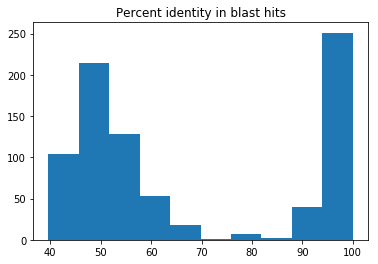

In [3]:
plt.hist(df[12])
plt.title("Percent identity in blast hits")
plt.show()

In [4]:
# filtered_df = df[df[12] > 70] #remove everything with less than 70% divergence

In [6]:
df[1]

0      WP_012569506.1
1      WP_006462513.1
2      WP_008832113.1
3            P42212.1
4      WP_077638175.1
5          PTB82212.1
6          AAN86140.1
7          AWC67560.1
8          AAA27722.1
9          AAN86138.1
10         AAN86137.1
11             1GFL_A
12     WP_087671979.1
13     WP_068464625.1
14     WP_069953167.1
15         KWT64529.1
16         ALW83197.1
17     WP_079863969.1
18     WP_038430632.1
19         SCV58932.1
20     WP_133279792.1
21     XP_013248715.1
22     WP_127074437.1
23     WP_031943942.1
24           2008181A
25     WP_106508751.1
26     WP_046835546.1
27         ABV01355.1
28         AAA58246.1
29             5HBD_A
            ...      
788            1GGX_A
789            1ZGP_A
790        AGI04919.1
791        AGI04840.1
792        OZM44449.1
793            4I2Y_A
794        AGI04929.1
795        AGI04894.1
796        AGI04927.1
797            2V4E_C
798            2V4E_A
799        AGI04858.1
800    XP_016022663.1
801        AGI04857.1
802       

In [8]:
Entrez.email = 'yangd5153@gmail.com'
handle = Entrez.efetch(db="protein", id=df[1][22], rettype="fasta", retmode="xml")
a = Entrez.read(handle)

In [ ]:
a[0]['TSeq_sequence']

In [ ]:
record_dict = {}

for entry in df[1]:
#     print (entry)
#     try:
    print (entry)
    handle = Entrez.efetch(db="protein", id=entry, rettype="fasta", retmode="xml")
    record = Entrez.read(handle)[0]
    record_dict[entry] = record['TSeq_sequence']
    time.sleep(.5)
#     except:
#         print ("pass")
#         pass

    
# w = csv.writer(open("GFP_ncbi_full.tab", "w"), delimiter="\t")
# for key, val in record_dict.items():
#     w.writerow([key, val])

WP_012569506.1


//anaconda/envs/ML_env/lib/python3.6/site-packages/Bio/Entrez/__init__.py:580: UserWarning: 
Email address is not specified.

To make use of NCBI's E-utilities, NCBI requires you to specify your
email address with each request.  As an example, if your email address
is A.N.Other@example.com, you can specify it as follows:
   from Bio import Entrez
   Entrez.email = 'A.N.Other@example.com'
In case of excessive usage of the E-utilities, NCBI will attempt to contact
a user at the email address provided before blocking access to the
E-utilities.
  E-utilities.""", UserWarning)


pass
WP_006462513.1
pass
WP_008832113.1
pass
P42212.1
pass
WP_077638175.1


In [ ]:
record_dict

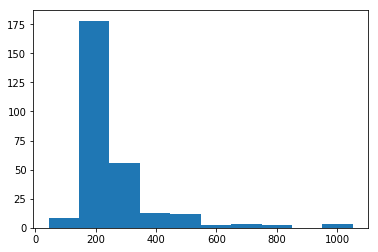

In [41]:
plt.hist(np.array([len(record_dict[item]) for item in record_dict]))
plt.show()

In [49]:
SeqIO.convert('GFP_orthologs.tab', 'tab', 'GFP_orthologs.fasta', 'fasta')

277

In [48]:
w = csv.writer(open("GFP_orthologs.tab", "w"), delimiter="\t")
for key, val in record_dict.items():
    w.writerow([key, val])

In [68]:
len(np.array([len(record_dict[item]) for item in record_dict]))

277

In [88]:
filtered_record_dict = {}

for key, val in record_dict.items():
    if (len(val) > 220 and len(val) < 300):
        filtered_record_dict[key] = val

w = csv.writer(open("filtered_GFP_orthologs.tab", "w"), delimiter="\t")
for key, val in filtered_record_dict.items():
    w.writerow([key, val])

SeqIO.convert('filtered_GFP_orthologs.tab', 'tab', 'filtered_GFP_orthologs.fasta', 'fasta')

199

In [101]:
total_record_dict = filtered_record_dict.copy()
sarkisyan = pd.read_csv("sarkisyan.csv")

In [102]:
for i in range(len(sarkisyan)):
    name = "sarkisyan_" + str(i+1)
    total_record_dict[name] = sarkisyan['sequence'][i]

In [103]:
w = csv.writer(open("Augmented_sarkisyan.tab", "w"), delimiter="\t")
for key, val in total_record_dict.items():
    w.writerow([key, val])

In [104]:
SeqIO.convert('Augmented_sarkisyan.tab', 'tab', 'Augmented_sarkisyan.fasta', 'fasta')

51910

In [109]:
file1 = open("alignment_table","a") 


In [131]:
from io import StringIO

aligned_seqs = np.loadtxt('gfp_uniprot_alignment', dtype="str")

In [132]:
len(aligned_seqs)

709

In [133]:
aligned_dict = {}

for i in range(len(aligned_seqs)):
    aligned_dict[aligned_seqs[i][0]] = aligned_seqs[i][1]

In [134]:
w = csv.writer(open("aligned_gfp_uniprot.tab", "w"), delimiter="\t")
for key, val in aligned_dict.items():
    w.writerow([key, val])

In [136]:
SeqIO.convert('aligned_gfp_uniprot.tab', 'tab', 'aligned_gfp_uniprot.fasta', 'fasta')

682